In [2]:
import pandas as pd
import numpy as np

In [7]:
file_path = r"C:\Users\HP\Downloads\FIrst SQL Tableau Project\CLeanedWalmartData.csv"

In [14]:
data = pd.read_csv(file_path)

In [12]:
data.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_pct,total,date,time,payment,cogs,gross_margin_pct,gross_income,rating,time_of_day,day,month
0,101-17-6199,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,3/13/2019 0:00,19:44:00,Credit card,320.53,4.761905,16.0265,7.0,Evening,Wednesday,March
1,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,1/17/2019 0:00,12:36:00,Ewallet,125.64,4.761905,6.2820,4.9,Afternoon,Thursday,January
2,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,3/20/2019 0:00,17:52:00,Cash,126.25,4.761905,6.3125,6.1,Evening,Wednesday,March
3,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,480.0285,3/5/2019 0:00,18:02:00,Credit card,457.17,4.761905,22.8585,4.2,Evening,Tuesday,March
4,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,45.1080,2/27/2019 0:00,12:22:00,Ewallet,42.96,4.761905,2.1480,6.6,Afternoon,Wednesday,February


# QUESTIONS TO ANSWER

# 1)Which product lines generate the most revenue?
# 2)How does sales performance vary by branch and city?
# 3)What is the distribution of sales over different times of the day?
# 4)Is there a difference in spending between Members and Normal customers?
# 5)What is the gender distribution of customers across different product lines?
# 6)How does the rating vary across different product lines?
# 7)What is the payment method preference among customers?

# 1)Which product lines generate the most revenue?

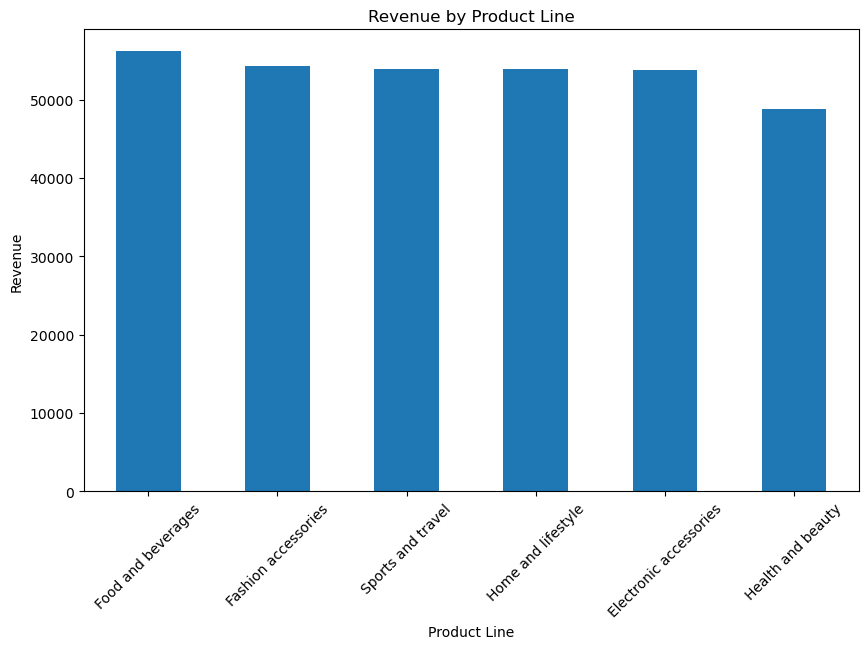

In [16]:
import matplotlib.pyplot as plt

# Group by product line and sum the total revenue
product_line_revenue = data.groupby('product_line')['total'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
product_line_revenue.plot(kind='bar')
plt.title('Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# We see that Food and Beverages enerate the most revenue, but the difference isn;t so much

# 2)How does sales performance vary by branch and city?

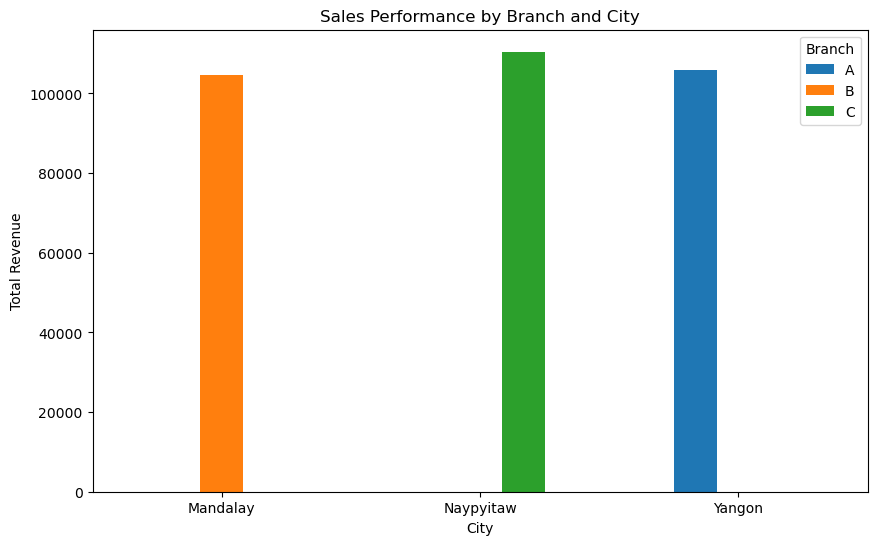

In [20]:
# Group by city and branch, sum the total revenue
branch_city_revenue = data.groupby(['city', 'branch'])['total'].sum().unstack()

# Plotting
branch_city_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Performance by Branch and City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.legend(title='Branch')
plt.show()

In [ ]:
# We can see that 'Naypyitaw city' has the highest sales and 'branch C' has the highest sales

# 3)What is the distribution of sales over different times of the day?

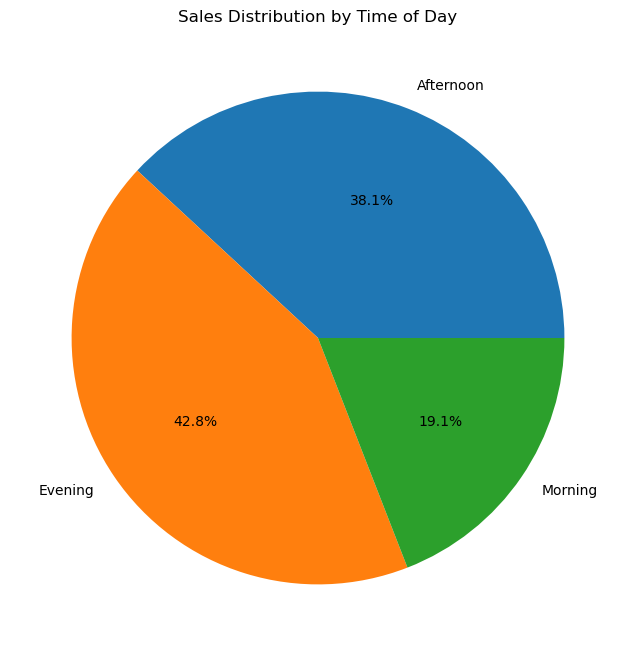

In [24]:
# Group by time of day and sum the total revenue
time_of_day_revenue = data.groupby('time_of_day')['total'].sum()

# Plotting
time_of_day_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales Distribution by Time of Day')
plt.ylabel('')
plt.show()

In [ ]:
# We see that we have more sales in the Evenings

In [ ]:
# 4)Is there a difference in spending between Members and Normal customers?

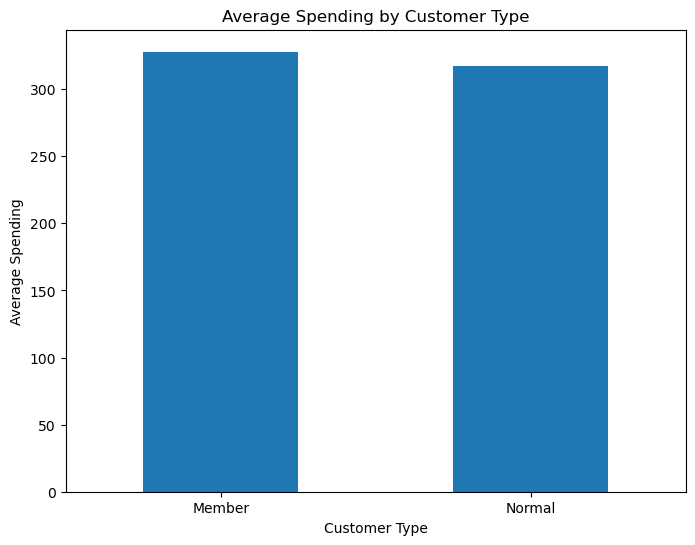

In [26]:
# Group by customer type and calculate the average total spending
customer_type_spending = data.groupby('customer_type')['total'].mean()

# Plotting
customer_type_spending.plot(kind='bar', figsize=(8, 6))
plt.title('Average Spending by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# We see that the 'Member' type of customers spends a bit more than the "Normal' customers

In [ ]:
# 5) What is the gender distribution of customers across different product lines?

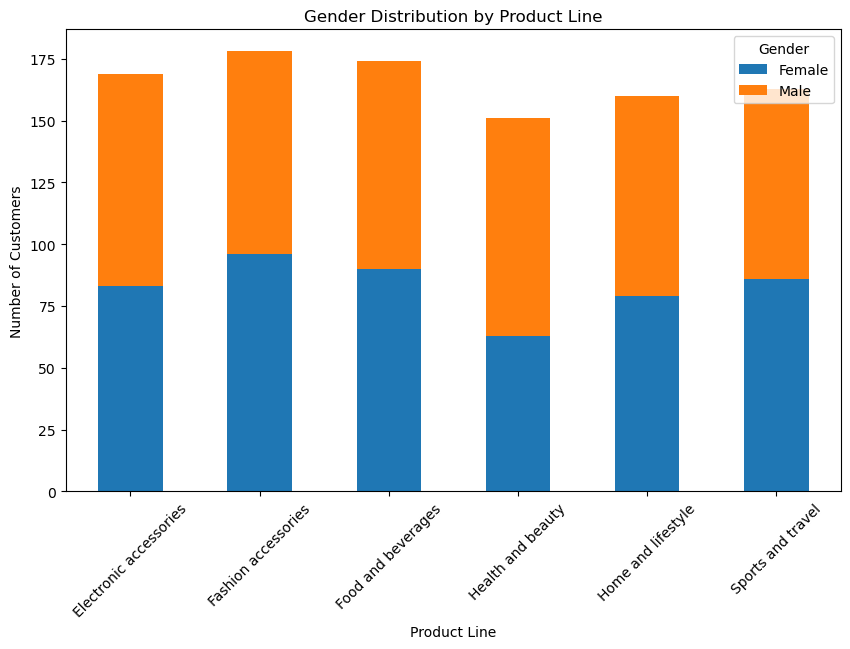

In [28]:
# Group by product line and gender, count the occurrences
gender_distribution = data.groupby(['product_line', 'gender']).size().unstack()

# Plotting
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
# Fashion Accessories had the most number of customers
# We see that we had more male customers than female customers that buy Health
# And beauty products, which seems a bit odd.
# mORE FEMALE customers bought more fashion accessories than males. This isn't so surprisin

In [ ]:
# 6) Which gender do we have mor as our customers

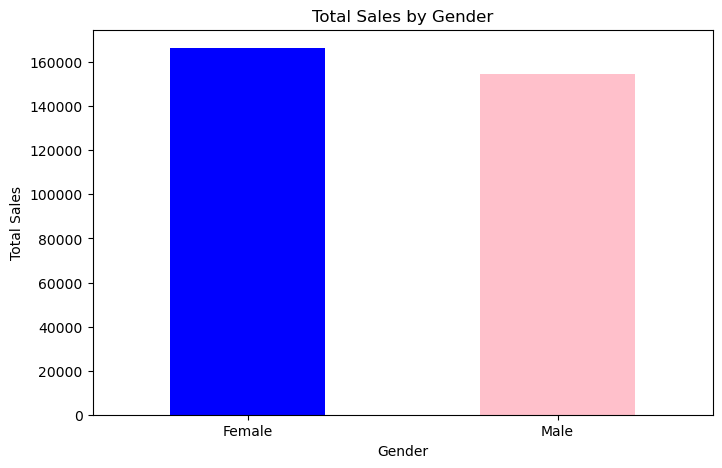

In [43]:
sales_by_gender = data.groupby('gender')['total'].sum()
sales_by_gender.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 5))
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# We had more female customers than male customers.

# 7)How does the rating vary across different product lines?

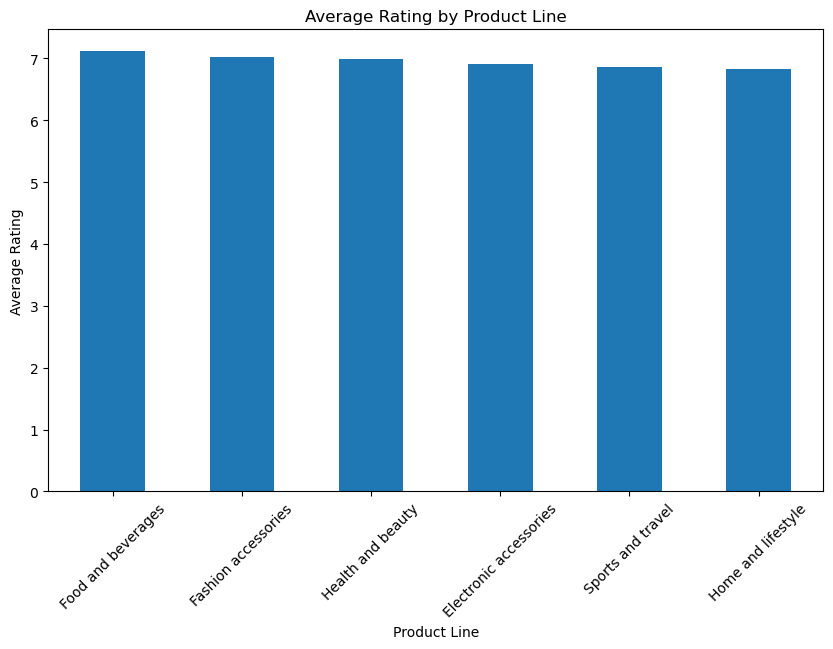

In [45]:
# Group by product line and calculate the average rating
product_line_rating = data.groupby('product_line')['rating'].mean().sort_values(ascending=False)

# Plotting
product_line_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# We see that there were no much differences in ratings across the product lines.

# 8) What is the payment method preference among customers?

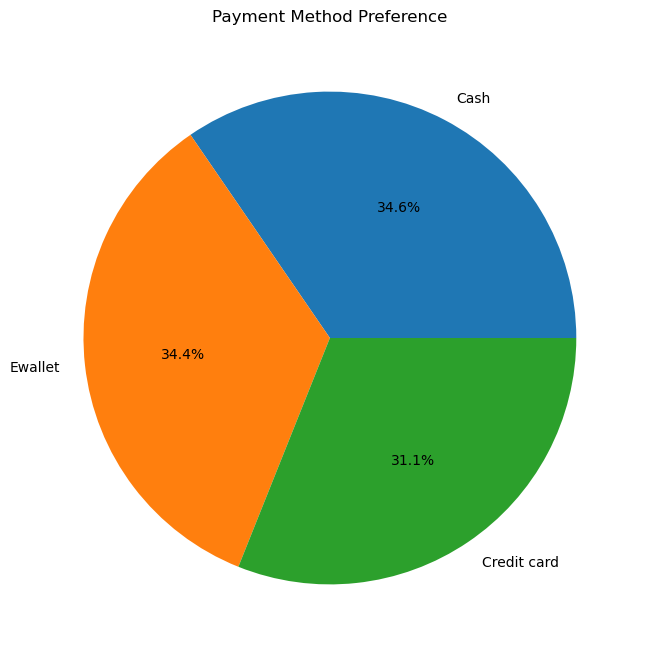

In [51]:
# Group by payment method and count the occurrences
payment_method_preference = data['payment'].value_counts()

# Plotting
payment_method_preference.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Payment Method Preference')
plt.ylabel('')
plt.show()